- 依說明文件，'DAYS_ENDDATE_FACT'(貸款已結束幾天)應只有在Closed的狀況下有值，建議將Active狀態下的此欄都改為na(數目不多)
- 檢查貸款結束天數DAYS_CREDIT_ENDDATE與DAYS_CREDIT的關係，大小的關係很怪；將DAYS_CREDIT_ENDDATE小於DAYS_CREDIT的DAYS_CREDIT_ENDDATE值都改為na
- DAYS_CREDIT_UPDATE小於-40000改為na
---------------
- CREDIT_DAY_OVERDUE的max,mean
- CREDIT_CURRENCY各幣別比例
- CREDIT_ACTIVE各狀態比例,非close的AMT_CREDIT_SUM_DEBT的max,mean
- AMT_CREDIT_MAX_OVERDUE的max,mean
- CNT_CREDIT_PROLONG的max,mean
- AMT_CREDIT_SUM的max,min
- AMT_CREDIT_SUM_DEBT的max,mean
- AMT_CREDIT_SUM_LIMIT的mean
- AMT_CREDIT_SUM_OVERDUE的max,mean
- CREDIT_TYPE的各比例
- DAYS_CREDIT_UPDATE的max,median
- AMT_ANNUITY的max,min
- AMT_ANNUITY/AMT_CREDIT_SUM的max,min
- DAYS_CREDIT_ENDDATE負值數目佔總數(不含na)的比例
- DAYS_CREDIT_ENDDATE的median
- AMT_CREDIT_SUM_DEBT/AMT_CREDIT_SUM的max,mean
- AMT_CREDIT_SUM_OVERDUE/AMT_CREDIT_SUM的max,mean
- AMT_CREDIT_MAX_OVERDUE/AMT_CREDIT_SUM的max,mean
- bureau_balance表合併過來的各欄位max,mean


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
bureau = pd.read_csv("..\\..\\datasets\\homecdt_eda\\bureau.csv")

In [3]:
bureau.shape

(1716428, 17)

In [4]:
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


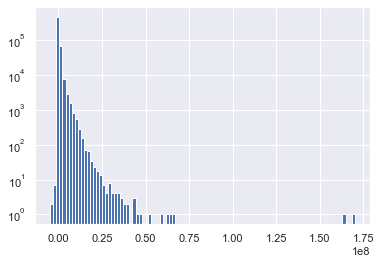

In [5]:
bureau[bureau['CREDIT_ACTIVE']!='Closed']['AMT_CREDIT_SUM_DEBT'].hist(bins=100,log=True)

In [6]:
bureau['CREDIT_TYPE'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

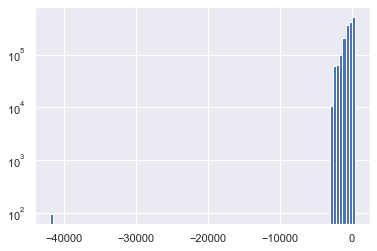

In [7]:
bureau['DAYS_CREDIT_UPDATE'].hist(bins=100,log=True)

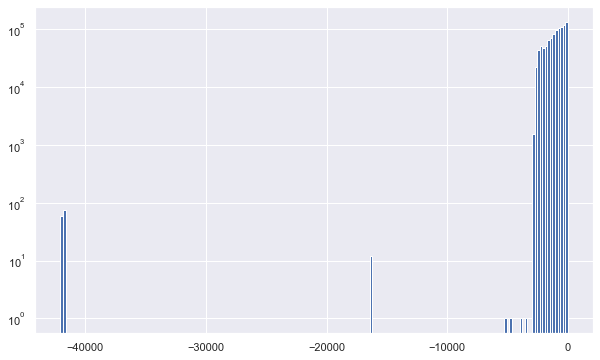

In [8]:
plt.figure(figsize=(10,6))
bureau[bureau['DAYS_CREDIT_ENDDATE']<0]['DAYS_CREDIT_ENDDATE'].hist(bins=200,log=True)

In [9]:
bbFE = pd.read_csv("..\\..\\datasets\\homecdt_fteng\\bureau_balance_FE.csv")
bbFE.head()

,SK_ID_BUREAU,total_status_0%,total_status_1%,total_status_2%,total_status_3%,total_status_4%,total_status_5%,total_status_C%,total_status_X%,recent_3_status_0%,...,recent_6_status_C%,recent_6_status_X%,recent_9_status_0%,recent_9_status_1%,recent_9_status_2%,recent_9_status_3%,recent_9_status_4%,recent_9_status_5%,recent_9_status_C%,recent_9_status_X%
0,5001709,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,0.000000,...,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,5001710,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,0.000000,...,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00
2,5001711,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.666667,...,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.25
3,5001712,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,0.000000,...,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.00
4,5001713,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,...,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00


In [10]:
bbFE.columns

Index(['SK_ID_BUREAU', 'total_status_0%', 'total_status_1%', 'total_status_2%',
       'total_status_3%', 'total_status_4%', 'total_status_5%',
       'total_status_C%', 'total_status_X%', 'recent_3_status_0%',
       'recent_3_status_1%', 'recent_3_status_2%', 'recent_3_status_3%',
       'recent_3_status_4%', 'recent_3_status_5%', 'recent_3_status_C%',
       'recent_3_status_X%', 'recent_6_status_0%', 'recent_6_status_1%',
       'recent_6_status_2%', 'recent_6_status_3%', 'recent_6_status_4%',
       'recent_6_status_5%', 'recent_6_status_C%', 'recent_6_status_X%',
       'recent_9_status_0%', 'recent_9_status_1%', 'recent_9_status_2%',
       'recent_9_status_3%', 'recent_9_status_4%', 'recent_9_status_5%',
       'recent_9_status_C%', 'recent_9_status_X%'],
      dtype='object')

In [11]:
bureau = pd.merge(bureau,bbFE,how='outer')

In [12]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'total_status_0%', 'total_status_1%', 'total_status_2%',
       'total_status_3%', 'total_status_4%', 'total_status_5%',
       'total_status_C%', 'total_status_X%', 'recent_3_status_0%',
       'recent_3_status_1%', 'recent_3_status_2%', 'recent_3_status_3%',
       'recent_3_status_4%', 'recent_3_status_5%', 'recent_3_status_C%',
       'recent_3_status_X%', 'recent_6_status_0%', 'recent_6_status_1%',
       'recent_6_status_2%', 'recent_6_status_3%', 'recent_6_status_4%',
       'recent_6_status_5%', 'recent_6_status_C%', 'recent_6_status_X%',
       'recent_9_status_0%', 'recent_9_status_1%', 'recent_9_status

In [13]:
bureau[(bureau['CREDIT_ACTIVE']=='Active')&(bureau['DAYS_ENDDATE_FACT'].isnull()==False)]['DAYS_ENDDATE_FACT']

1872       -403.0
3549        -56.0
4124        -71.0
4171      -1195.0
4685        -63.0
            ...  
1711721     -44.0
1711736   -1349.0
1712703   -1092.0
1713185   -2409.0
1715770   -2225.0
Name: DAYS_ENDDATE_FACT, Length: 1969, dtype: float64

In [14]:
bureau.loc[bureau['CREDIT_ACTIVE']=='Active',['DAYS_ENDDATE_FACT']] = np.nan

In [15]:
bureau[(bureau['CREDIT_ACTIVE']=='Active')&(bureau['DAYS_ENDDATE_FACT'].isnull()==False)]['DAYS_ENDDATE_FACT'].value_counts()

Series([], Name: DAYS_ENDDATE_FACT, dtype: int64)

In [16]:
bureau[(bureau['CREDIT_ACTIVE']=='Active')&(bureau['DAYS_ENDDATE_FACT'].isnull()==False)]['DAYS_ENDDATE_FACT']

Series([], Name: DAYS_ENDDATE_FACT, dtype: float64)

In [17]:
bureau.loc[(bureau['DAYS_CREDIT_ENDDATE']) < (bureau['DAYS_CREDIT'])][['DAYS_CREDIT_ENDDATE','DAYS_CREDIT']]

,DAYS_CREDIT_ENDDATE,DAYS_CREDIT
55561,-16322.0,-841.0
63031,-222.0,0.0
67507,-41847.0,-388.0
98826,-41824.0,-2317.0
106353,-41836.0,-2579.0
...,...,...
1595661,-16295.0,-2697.0
1663955,-41823.0,-2783.0
1667368,-16300.0,-835.0
1684396,-41846.0,-2252.0


In [18]:
bureau.loc[(bureau['DAYS_CREDIT_ENDDATE']) < (bureau['DAYS_CREDIT']),['DAYS_CREDIT_ENDDATE']] = np.nan

In [19]:
bureau.loc[(bureau['DAYS_CREDIT_ENDDATE']) < (bureau['DAYS_CREDIT'])][['DAYS_CREDIT_ENDDATE','DAYS_CREDIT']]

,DAYS_CREDIT_ENDDATE,DAYS_CREDIT


In [20]:
bureau.loc[(bureau['DAYS_CREDIT_UPDATE']<-40000),['DAYS_CREDIT_UPDATE']]

,DAYS_CREDIT_UPDATE
1943,-41857.0
25051,-41913.0
30474,-41906.0
30531,-41886.0
60385,-41934.0
...,...
1655691,-41936.0
1664368,-41854.0
1686166,-41884.0
1688873,-41862.0


In [21]:
bureau.loc[(bureau['DAYS_CREDIT_UPDATE']<=-40000),['DAYS_CREDIT_UPDATE']] = np.nan

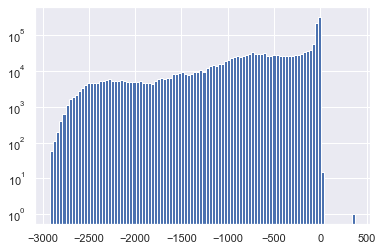

In [22]:
bureau['DAYS_CREDIT_UPDATE'].hist(bins=100,log=True)

In [23]:
bureau.loc[(bureau['DAYS_CREDIT_UPDATE']>0),['DAYS_CREDIT_UPDATE']]

,DAYS_CREDIT_UPDATE
156979,20.0
272146,20.0
463222,13.0
471016,13.0
471246,13.0
984063,22.0
1099999,23.0
1111309,16.0
1171515,19.0
1238331,14.0


In [24]:
bureau['DEBT/CREDIT'] = bureau['AMT_CREDIT_SUM_DEBT']/bureau['AMT_CREDIT_SUM']
bureau['SUM_OVERDUE/CREDIT'] = bureau['AMT_CREDIT_SUM_OVERDUE']/bureau['AMT_CREDIT_SUM']
bureau['MAX_OVERDUE/CREDIT'] = bureau['AMT_CREDIT_MAX_OVERDUE']/bureau['AMT_CREDIT_SUM']

- CREDIT_DAY_OVERDUE的max,mean
- CREDIT_CURRENCY各幣別比例
- CREDIT_ACTIVE各狀態比例,非close的AMT_CREDIT_SUM_DEBT的max,mean
- AMT_CREDIT_MAX_OVERDUE的max,mean
- CNT_CREDIT_PROLONG的max,mean
- AMT_CREDIT_SUM的max,min
- AMT_CREDIT_SUM_DEBT的max,mean
- AMT_CREDIT_SUM_LIMIT的mean
- AMT_CREDIT_SUM_OVERDUE的max,mean
- CREDIT_TYPE的各比例
- DAYS_CREDIT_UPDATE的max,median
- AMT_ANNUITY的max,min
- AMT_ANNUITY/AMT_CREDIT_SUM的max,min
- DAYS_CREDIT_ENDDATE負值數目佔總數(不含na)的比例
- DAYS_CREDIT_ENDDATE的median
- AMT_CREDIT_SUM_DEBT/AMT_CREDIT_SUM的max,mean
- AMT_CREDIT_SUM_OVERDUE/AMT_CREDIT_SUM的max,mean
- AMT_CREDIT_MAX_OVERDUE/AMT_CREDIT_SUM的max,mean
- bureau_balance表合併過來的各欄位max,mean

### bureau2將需要做max,min的欄位整理好

In [25]:
# 把需要做mean,max的欄位篩選出
new_feature = ['CREDIT_DAY_OVERDUE',
               'AMT_CREDIT_MAX_OVERDUE',
               'CNT_CREDIT_PROLONG',
               'AMT_CREDIT_SUM_DEBT',
               'AMT_CREDIT_SUM_OVERDUE',
               'DEBT/CREDIT',
               'SUM_OVERDUE/CREDIT',
               'MAX_OVERDUE/CREDIT']

for column in bbFE.columns:
    new_feature.append(column)

new_feature.remove('SK_ID_BUREAU')    
new_feature

['CREDIT_DAY_OVERDUE',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DEBT/CREDIT',
 'SUM_OVERDUE/CREDIT',
 'MAX_OVERDUE/CREDIT',
 'total_status_0%',
 'total_status_1%',
 'total_status_2%',
 'total_status_3%',
 'total_status_4%',
 'total_status_5%',
 'total_status_C%',
 'total_status_X%',
 'recent_3_status_0%',
 'recent_3_status_1%',
 'recent_3_status_2%',
 'recent_3_status_3%',
 'recent_3_status_4%',
 'recent_3_status_5%',
 'recent_3_status_C%',
 'recent_3_status_X%',
 'recent_6_status_0%',
 'recent_6_status_1%',
 'recent_6_status_2%',
 'recent_6_status_3%',
 'recent_6_status_4%',
 'recent_6_status_5%',
 'recent_6_status_C%',
 'recent_6_status_X%',
 'recent_9_status_0%',
 'recent_9_status_1%',
 'recent_9_status_2%',
 'recent_9_status_3%',
 'recent_9_status_4%',
 'recent_9_status_5%',
 'recent_9_status_C%',
 'recent_9_status_X%']

In [26]:
dict_type = {}
for i in new_feature:
        dict_type[i] = ['max','mean']
num_aggregations = dict_type

# 計算出現的次數
# count = {'SK_ID_PREV':'count'}

bureau2 = bureau.groupby(['SK_ID_CURR']).agg({**num_aggregations})


# 重新排列欄位
columns = []

for m in bureau2.columns.levels[0]:
    for n in bureau2.columns.levels[1]:
        columns.append(f'BU_{m}_{n}')
        
bureau2.columns = columns

bureau2.reset_index(level=('SK_ID_CURR'),inplace=True)

In [30]:
pd.set_option('display.max_columns',None)
bureau2.head()

,SK_ID_CURR,BU_CREDIT_DAY_OVERDUE_max,BU_CREDIT_DAY_OVERDUE_mean,BU_AMT_CREDIT_MAX_OVERDUE_max,BU_AMT_CREDIT_MAX_OVERDUE_mean,BU_CNT_CREDIT_PROLONG_max,BU_CNT_CREDIT_PROLONG_mean,BU_AMT_CREDIT_SUM_DEBT_max,BU_AMT_CREDIT_SUM_DEBT_mean,BU_AMT_CREDIT_SUM_OVERDUE_max,BU_AMT_CREDIT_SUM_OVERDUE_mean,BU_DEBT/CREDIT_max,BU_DEBT/CREDIT_mean,BU_SUM_OVERDUE/CREDIT_max,BU_SUM_OVERDUE/CREDIT_mean,BU_MAX_OVERDUE/CREDIT_max,BU_MAX_OVERDUE/CREDIT_mean,BU_total_status_0%_max,BU_total_status_0%_mean,BU_total_status_1%_max,BU_total_status_1%_mean,BU_total_status_2%_max,BU_total_status_2%_mean,BU_total_status_3%_max,BU_total_status_3%_mean,BU_total_status_4%_max,BU_total_status_4%_mean,BU_total_status_5%_max,BU_total_status_5%_mean,BU_total_status_C%_max,BU_total_status_C%_mean,BU_total_status_X%_max,BU_total_status_X%_mean,BU_recent_3_status_0%_max,BU_recent_3_status_0%_mean,BU_recent_3_status_1%_max,BU_recent_3_status_1%_mean,BU_recent_3_status_2%_max,BU_recent_3_status_2%_mean,BU_recent_3_status_3%_max,BU_recent_3_status_3%_mean,BU_recent_3_status_4%_max,BU_recent_3_status_4%_mean,BU_recent_3_status_5%_max,BU_recent_3_status_5%_mean,BU_recent_3_status_C%_max,BU_recent_3_status_C%_mean,BU_recent_3_status_X%_max,BU_recent_3_status_X%_mean,BU_recent_6_status_0%_max,BU_recent_6_status_0%_mean,BU_recent_6_status_1%_max,BU_recent_6_status_1%_mean,BU_recent_6_status_2%_max,BU_recent_6_status_2%_mean,BU_recent_6_status_3%_max,BU_recent_6_status_3%_mean,BU_recent_6_status_4%_max,BU_recent_6_status_4%_mean,BU_recent_6_status_5%_max,BU_recent_6_status_5%_mean,BU_recent_6_status_C%_max,BU_recent_6_status_C%_mean,BU_recent_6_status_X%_max,BU_recent_6_status_X%_mean,BU_recent_9_status_0%_max,BU_recent_9_status_0%_mean,BU_recent_9_status_1%_max,BU_recent_9_status_1%_mean,BU_recent_9_status_2%_max,BU_recent_9_status_2%_mean,BU_recent_9_status_3%_max,BU_recent_9_status_3%_mean,BU_recent_9_status_4%_max,BU_recent_9_status_4%_mean,BU_recent_9_status_5%_max,BU_recent_9_status_5%_mean,BU_recent_9_status_C%_max,BU_recent_9_status_C%_mean,BU_recent_9_status_X%_max,BU_recent_9_status_X%_mean
0,100001.0,0.0,0.0,NaN,NaN,0.0,0.0,373239.0,85240.928571,0.0,0.0,0.987405,0.282518,0.0,0.0,NaN,NaN,1.000000,0.336651,0.052632,0.007519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.441240,0.500000,0.214590,1.000000,0.309524,0.333333,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571429,0.500000,0.071429,1.0,0.333333,0.166667,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.571429,0.500000,0.071429,1.000000,0.309524,0.111111,0.015873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.571429,0.500000,0.103175
1,100002.0,0.0,0.0,5043.645,1681.029,0.0,0.0,245781.0,49156.200000,0.0,0.0,0.546180,0.136545,0.0,0.0,0.174139,0.043436,0.818182,0.406960,0.500000,0.255682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812500,0.175426,0.500000,0.161932,0.666667,0.166667,0.666667,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.541667,0.333333,0.041667,0.5,0.270833,0.500000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.333333,0.500000,0.062500,0.666667,0.263889,0.555556,0.354167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.263889,0.500000,0.118056
2,100003.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100004.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005.0,0.0,0.0,0.000,0.000,0.0,0.0,543087.0,189469.500000,0.0,0.0,0.954794,0.601256,0.0,0.0,0.000000,0.000000,1.000000,0.735043,0.000000,0.000000,0.0,0.0,0.0,

### bureau3將需要做max,min的欄位整理好

In [31]:
bureau['ANNUITY/CREDIT'] = bureau['AMT_ANNUITY']/bureau['AMT_CREDIT_SUM']

In [32]:
# 把需要做max,min的欄位篩選出
new_feature = []
new_feature = ['AMT_CREDIT_SUM',
               'AMT_ANNUITY',
               'ANNUITY/CREDIT']
new_feature

['AMT_CREDIT_SUM', 'AMT_ANNUITY', 'ANNUITY/CREDIT']

In [34]:
dict_type = {}
for i in new_feature:
    dict_type[i] = ['max','min']
num_aggregations = dict_type
num_aggregations

{'AMT_CREDIT_SUM': ['max', 'min'],
 'AMT_ANNUITY': ['max', 'min'],
 'ANNUITY/CREDIT': ['max', 'min']}

In [38]:
bureau3 = bureau.groupby('SK_ID_CURR').agg({**num_aggregations})
bureau3.columns

MultiIndex([('AMT_CREDIT_SUM', 'max'),
            ('AMT_CREDIT_SUM', 'min'),
            (   'AMT_ANNUITY', 'max'),
            (   'AMT_ANNUITY', 'min'),
            ('ANNUITY/CREDIT', 'max'),
            ('ANNUITY/CREDIT', 'min')],
           )

In [42]:
columns = []
for m in bureau3.columns.levels[0]:
    for n in bureau3.columns.levels[1]:
        columns.append(f'BU_{m}_{n}')
bureau3.columns = columns

In [43]:
bureau3.reset_index(level=('SK_ID_CURR'),inplace=True)
bureau3.head()

,SK_ID_CURR,BU_AMT_CREDIT_SUM_max,BU_AMT_CREDIT_SUM_min,BU_AMT_ANNUITY_max,BU_AMT_ANNUITY_min,BU_ANNUITY/CREDIT_max,BU_ANNUITY/CREDIT_min
0,100001.0,378000.0,85500.0,10822.5,0.0,0.055627,0.0
1,100002.0,450000.0,0.0,0.0,0.0,0.000000,0.0
2,100003.0,810000.0,22248.0,NaN,NaN,NaN,NaN
3,100004.0,94537.8,94500.0,NaN,NaN,NaN,NaN
4,100005.0,568800.0,29826.0,4261.5,0.0,0.142879,0.0


### bureau4處理其他統計值

In [67]:
bureau4 = bureau.groupby('SK_ID_CURR').agg({'DAYS_CREDIT_UPDATE':['max','median'],
                                            'DAYS_CREDIT_ENDDATE':'median',
                                            'AMT_CREDIT_SUM_LIMIT':'mean'})
bureau4.columns = ['BU_DAYS_CREDIT_UPDATE_max',
                   'BU_DAYS_CREDIT_UPDATE_median',
                   'BU_DAYS_CREDIT_ENDDATE_median',
                   'BU_AMT_CREDIT_SUM_LIMIT_mean']

bureau4.reset_index(level='SK_ID_CURR',inplace=True)
bureau4.head()

,SK_ID_CURR,BU_DAYS_CREDIT_UPDATE_max,BU_DAYS_CREDIT_UPDATE_median,BU_DAYS_CREDIT_ENDDATE_median,BU_AMT_CREDIT_SUM_LIMIT_mean
0,100001.0,-6.0,-155.0,-179.0,0.0
1,100002.0,-7.0,-832.0,-424.5,0.0
2,100003.0,-43.0,-545.0,-480.0,202500.0
3,100004.0,-382.0,-532.0,-488.5,0.0
4,100005.0,-11.0,-31.0,122.0,0.0


### bureau5計算DAYS_CREDIT_ENDDATE的負值比例

In [45]:
bureau['DAYS_CREDIT_ENDDATE_NEG'] = np.where(bureau['DAYS_CREDIT_ENDDATE']<0,1,0)
bureau[['DAYS_CREDIT_ENDDATE','DAYS_CREDIT_ENDDATE_NEG']].head()

,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_ENDDATE_NEG
0,-153.0,1
1,1075.0,0
2,528.0,0
3,NaN,0
4,1197.0,0


In [50]:
bureau.dropna(subset=['DAYS_CREDIT_ENDDATE'],inplace=True)
bureau[['DAYS_CREDIT_ENDDATE','DAYS_CREDIT_ENDDATE_NEG']].head()

,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_ENDDATE_NEG
0,-153.0,1
1,1075.0,0
2,528.0,0
4,1197.0,0
5,27460.0,0


In [53]:
bureau5 = bureau.groupby('SK_ID_CURR').agg({'SK_ID_CURR':'count',
                                            'DAYS_CREDIT_ENDDATE_NEG':'sum'})
bureau5.columns = ['BU_SK_ID_CURR_count',
                   'BU_DAYS_CREDIT_ENDDATE_NEG_sum']
bureau5.reset_index(level='SK_ID_CURR',inplace=True)

In [56]:
bureau5['BU_DAYS_CREDIT_ENDDATE_NEG%'] = bureau5['BU_DAYS_CREDIT_ENDDATE_NEG_sum']/bureau5['BU_SK_ID_CURR_count']

In [61]:
bureau5.head()

,SK_ID_CURR,BU_SK_ID_CURR_count,BU_DAYS_CREDIT_ENDDATE_NEG_sum,BU_DAYS_CREDIT_ENDDATE_NEG%
0,100001.0,7,4,0.571429
1,100002.0,6,3,0.500000
2,100003.0,4,3,0.750000
3,100004.0,2,2,1.000000
4,100005.0,3,1,0.333333


In [65]:
bureau5.drop(columns=['BU_SK_ID_CURR_count','BU_DAYS_CREDIT_ENDDATE_NEG_sum'],inplace=True)
bureau5.head()

,SK_ID_CURR,BU_DAYS_CREDIT_ENDDATE_NEG%
0,100001.0,0.571429
1,100002.0,0.500000
2,100003.0,0.750000
3,100004.0,1.000000
4,100005.0,0.333333


### bureau6處理類別型資料的狀態比例

In [86]:
bureau6 = pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_CURRENCY'],normalize=0)
bureau6_2 = pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_TYPE'],normalize=0)

In [87]:
bureau6.head(10)

CREDIT_CURRENCY,currency 1,currency 2,currency 3,currency 4
SK_ID_CURR,,,,
100001.0,1.0,0.0,0.0,0.0
100002.0,1.0,0.0,0.0,0.0
100003.0,1.0,0.0,0.0,0.0
100004.0,1.0,0.0,0.0,0.0
100005.0,1.0,0.0,0.0,0.0
100007.0,1.0,0.0,0.0,0.0
100008.0,1.0,0.0,0.0,0.0
100009.0,1.0,0.0,0.0,0.0
100010.0,1.0,0.0,0.0,0.0


In [88]:
bureau6_2.head()

CREDIT_TYPE,Another type of loan,Car loan,Cash loan (non-earmarked),Consumer credit,Credit card,Interbank credit,Loan for business development,Loan for purchase of shares (margin lending),Loan for the purchase of equipment,Loan for working capital replenishment,Microloan,Mobile operator loan,Mortgage,Real estate loan,Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,,
100001.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
bureau6 = pd.concat([bureau6,bureau6_2],axis=1)
bureau6.head()

,currency 1,currency 2,currency 3,currency 4,Another type of loan,Car loan,Cash loan (non-earmarked),Consumer credit,Credit card,Interbank credit,Loan for business development,Loan for purchase of shares (margin lending),Loan for the purchase of equipment,Loan for working capital replenishment,Microloan,Mobile operator loan,Mortgage,Real estate loan,Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,,,,,,
100001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
bureau6.reset_index(level='SK_ID_CURR',inplace=True)

### 合併bureau2~6

In [92]:
bureau2.shape

(305811, 92)

In [93]:
bureau2 = pd.merge(bureau2,bureau3,how='left')

In [94]:
bureau2.shape

(305811, 92)

In [95]:
bureau2 = pd.merge(bureau2,bureau4,how='left')

In [96]:
bureau2.shape

(305811, 92)

In [97]:
bureau2 = pd.merge(bureau2,bureau5,how='left')

In [98]:
bureau2.shape

(305811, 92)

In [99]:
bureau2.head()

,SK_ID_CURR,BU_CREDIT_DAY_OVERDUE_max,BU_CREDIT_DAY_OVERDUE_mean,BU_AMT_CREDIT_MAX_OVERDUE_max,BU_AMT_CREDIT_MAX_OVERDUE_mean,BU_CNT_CREDIT_PROLONG_max,BU_CNT_CREDIT_PROLONG_mean,BU_AMT_CREDIT_SUM_DEBT_max,BU_AMT_CREDIT_SUM_DEBT_mean,BU_AMT_CREDIT_SUM_OVERDUE_max,BU_AMT_CREDIT_SUM_OVERDUE_mean,BU_DEBT/CREDIT_max,BU_DEBT/CREDIT_mean,BU_SUM_OVERDUE/CREDIT_max,BU_SUM_OVERDUE/CREDIT_mean,BU_MAX_OVERDUE/CREDIT_max,BU_MAX_OVERDUE/CREDIT_mean,BU_total_status_0%_max,BU_total_status_0%_mean,BU_total_status_1%_max,BU_total_status_1%_mean,BU_total_status_2%_max,BU_total_status_2%_mean,BU_total_status_3%_max,BU_total_status_3%_mean,BU_total_status_4%_max,BU_total_status_4%_mean,BU_total_status_5%_max,BU_total_status_5%_mean,BU_total_status_C%_max,BU_total_status_C%_mean,BU_total_status_X%_max,BU_total_status_X%_mean,BU_recent_3_status_0%_max,BU_recent_3_status_0%_mean,BU_recent_3_status_1%_max,BU_recent_3_status_1%_mean,BU_recent_3_status_2%_max,BU_recent_3_status_2%_mean,BU_recent_3_status_3%_max,BU_recent_3_status_3%_mean,BU_recent_3_status_4%_max,BU_recent_3_status_4%_mean,BU_recent_3_status_5%_max,BU_recent_3_status_5%_mean,BU_recent_3_status_C%_max,BU_recent_3_status_C%_mean,BU_recent_3_status_X%_max,BU_recent_3_status_X%_mean,BU_recent_6_status_0%_max,BU_recent_6_status_0%_mean,BU_recent_6_status_1%_max,BU_recent_6_status_1%_mean,BU_recent_6_status_2%_max,BU_recent_6_status_2%_mean,BU_recent_6_status_3%_max,BU_recent_6_status_3%_mean,BU_recent_6_status_4%_max,BU_recent_6_status_4%_mean,BU_recent_6_status_5%_max,BU_recent_6_status_5%_mean,BU_recent_6_status_C%_max,BU_recent_6_status_C%_mean,BU_recent_6_status_X%_max,BU_recent_6_status_X%_mean,BU_recent_9_status_0%_max,BU_recent_9_status_0%_mean,BU_recent_9_status_1%_max,BU_recent_9_status_1%_mean,BU_recent_9_status_2%_max,BU_recent_9_status_2%_mean,BU_recent_9_status_3%_max,BU_recent_9_status_3%_mean,BU_recent_9_status_4%_max,BU_recent_9_status_4%_mean,BU_recent_9_status_5%_max,BU_recent_9_status_5%_mean,BU_recent_9_status_C%_max,BU_recent_9_status_C%_mean,BU_recent_9_status_X%_max,BU_recent_9_status_X%_mean,BU_AMT_CREDIT_SUM_max,BU_AMT_CREDIT_SUM_min,BU_AMT_ANNUITY_max,BU_AMT_ANNUITY_min,BU_ANNUITY/CREDIT_max,BU_ANNUITY/CREDIT_min,BU_DAYS_CREDIT_UPDATE_max,BU_DAYS_CREDIT_UPDATE_median,BU_DAYS_CREDIT_ENDDATE_median,BU_AMT_CREDIT_SUM_LIMIT_mean,BU_DAYS_CREDIT_ENDDATE_NEG%
0,100001.0,0.0,0.0,NaN,NaN,0.0,0.0,373239.0,85240.928571,0.0,0.0,0.987405,0.282518,0.0,0.0,NaN,NaN,1.000000,0.336651,0.052632,0.007519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.441240,0.500000,0.214590,1.000000,0.309524,0.333333,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571429,0.500000,0.071429,1.0,0.333333,0.166667,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.571429,0.500000,0.071429,1.000000,0.309524,0.111111,0.015873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.571429,0.500000,0.103175,378000.0,85500.0,10822.5,0.0,0.055627,0.0,-6.0,-155.0,-179.0,0.0,0.571429
1,100002.0,0.0,0.0,5043.645,1681.029,0.0,0.0,245781.0,49156.200000,0.0,0.0,0.546180,0.136545,0.0,0.0,0.174139,0.043436,0.818182,0.406960,0.500000,0.255682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812500,0.175426,0.500000,0.161932,0.666667,0.166667,0.666667,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.541667,0.333333,0.041667,0.5,0.270833,0.500000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.333333,0.500000,0.062500,0.666667,0.263889,0.555556,0.354167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.263889,0.500000,0.118056,450000.0,0.0,0.0,0.0,0.000000,0.0,-7.0,-832.0,-424.5,0.0,0.500000
2,100003.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810000.0,22248.0,NaN,NaN,NaN,NaN,-43.0,-545.0,-480.0,202500.0,0.750000
3,100004.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,

In [100]:
bureau2 = pd.merge(bureau2,bureau6,how='left')

In [101]:
bureau2.shape

(305811, 111)

In [102]:
bureau2.to_csv('..\\..\\datasets\\homecdt_fteng\\bureau_FE(ht).csv',index = False)